# Ejercicios de Visualización con Matplotlib y Seaborn

La visualización de datos es una de las herramientas más importantes en el análisis de datos y la ciencia de datos. No solo nos permite explorar y entender mejor los datos, sino que también nos ayuda a comunicar hallazgos de manera efectiva. A través de gráficos, podemos detectar patrones, relaciones y anomalías que serían difíciles de identificar solo con números o tablas.

In [2]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


## Ejercicio 1 - Gráfico de líneas simple

Supongamos que, en tu oficina, te toma 10 segundos recorrer 25 metros caminando tranquilamente hacia la máquina de café. Si queremos expresar esta situación como una función lineal de la distancia respecto al tiempo, usamos la fórmula:

$
\text{distancia} = \text{velocidad} \times \text{tiempo}
$



Dado que la velocidad es constante, esta representa la pendiente de la función y se puede interpretar como la primera derivada de la distancia con respecto al tiempo. Es decir, nos indica qué tan rápido cambia la distancia mientras pasa el tiempo.

- **Calcula la velocidad constante a la que caminas:** Sabemos que recorriste 25 metros en 10 segundos. ¿Cuál es la velocidad (en metros/segundo)?
- **Construye la función lineal que describe cómo cambia la distancia con el tiempo:** Usa la fórmula `distancia = velocidad × tiempo` para calcular la distancia recorrida en cada segundo desde 0 a 10.
- **Usa Matplotlib para graficar cómo cambia la distancia con el tiempo:** Agrega etiquetas a los ejes y un título al gráfico.

In [3]:
seconds = np.arange(0, 11)  # Array con valores de 0 a 10
seconds

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
velocity = 25/10
meters = velocity * seconds
meters


array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ])

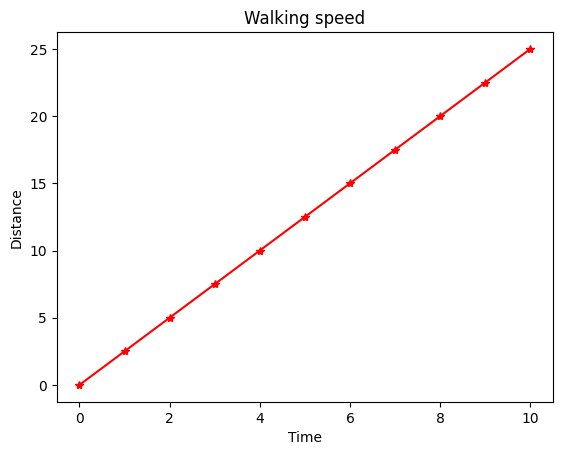

In [5]:
plt.plot(seconds, meters, color='red', marker='*')
plt.title('Walking speed')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()


### ¿Qué crees que pasaría con la gráfica si caminaras más rápido o más lento? ¿Cómo cambiaría la pendiente?

- Prueba modificar la velocidad a 3 m/s y vuelve a graficar.
- Escribe tus observaciones o conclusiones

In [6]:
velocity = 3
distance = velocity * seconds
distance



array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30])

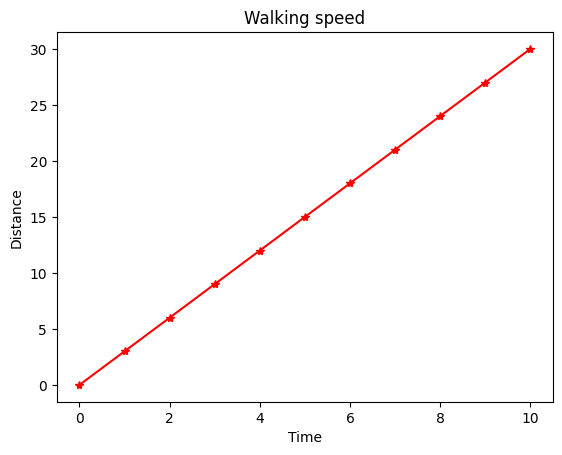

In [22]:
plt.plot(seconds, distance, color='red', marker='*')
plt.title('Walking speed')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()

### Conclusion Ej.1.2
Al aumentar la velocidad recorremos más camino.

## Ejercicio 2 - Representar visualmente datos categóricos.

Imagina que estás analizando cuántos estudiantes están matriculados en distintas carreras dentro de una universidad. Estos datos, que representan **categorías** (las carreras), son ideales para visualizar usando un **gráfico de barras**.

A continuación, se presenta un pequeño conjunto de datos con la cantidad de estudiantes por carrera.

In [8]:
df_careers = pd.DataFrame({'Carrera': ['Ingeniería', 'Medicina', 'Derecho', 'Psicología'],
                           'Estudiantes': [120, 80, 60, 100]})

df_careers

,Carrera,Estudiantes
0,Ingeniería,120
1,Medicina,80
2,Derecho,60
3,Psicología,100


1. Representa gráficamente cuántos estudiantes hay en cada carrera y utiliza un gráfico de barras vertical con Matplotlib. 
2. Etiqueta los ejes correctamente y agrega un título descriptivo.
3. Usa un color que ayude a destacar las diferencias entre categorías.
4. Escribe tus observaciones o conclusiones en una celda markdown


In [9]:
labels = df_careers['Carrera']
values = df_careers['Estudiantes']

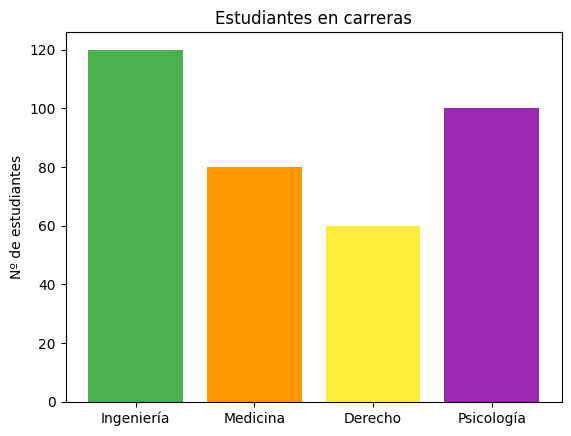

In [23]:
colours = ['#4CAF50', '#FF9800', '#FFEB3B', '#9C27B0']
plt.bar(labels, values,color = colours)
plt.title("Estudiantes en carreras")
plt.ylabel('Nº de estudiantes')
plt.show()

#### Conclusiones, observaciones, notas Ej. 2.1

La carrera de Ingeniería y de Psicología son las más demandadas.


### ¿Qué pasaría si usás un gráfico de barras **horizontal**? ¿Te resulta más legible?
1. Intenta hacerlo
2. Escribe tus observaciones o conclusiones en una celda markdown

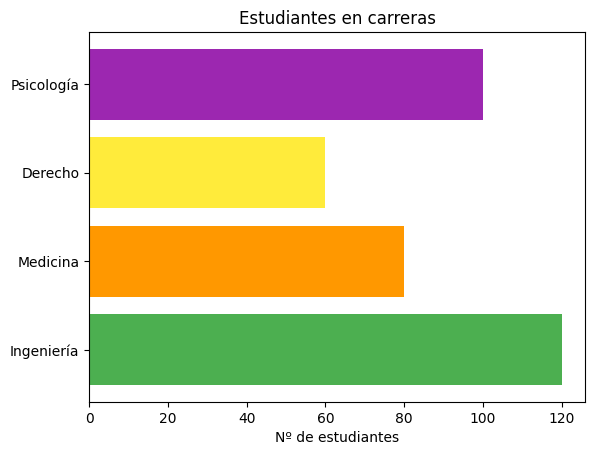

In [ ]:
colours = ['#4CAF50', '#FF9800', '#FFEB3B', '#9C27B0']
plt.barh(labels, values, color = colours)
plt.title("Estudiantes en carreras")
plt.xlabel('Nº de estudiantes')
plt.show()

#### Conclusiones, observaciones, notas Ej. 2.2
En este caso, ambos se leerian de forma correcta y clara.

## Ejercicio 3: Visualizar proporciones con un gráfico circular.

Supongamos que deseas entender cómo se distribuyen los estudiantes entre distintas carreras en una universidad. Aunque ya representaste estos datos con un gráfico de barras, ahora quieres ver **qué porcentaje del total representa cada carrera**.

Una forma muy común de representar proporciones es usando un **gráfico de pastel (pie chart)**, ya que permite tener una visión rápida e intuitiva de cómo se divide el todo.


- Representa los datos de `df_careers` como un gráfico de pastel.
- Muestra el **porcentaje** que representa cada carrera sobre el total.
- Agrega un **título descriptivo** que explique qué se está visualizando.
- Escribe tus observaciones o conclusiones en una celda markdown.

In [12]:
df_careers
labels = df_careers['Carrera']
values = df_careers['Estudiantes']


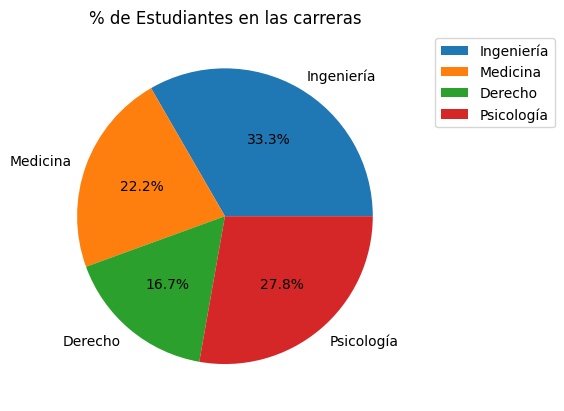

In [13]:
plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.title('% de Estudiantes en las carreras')
plt.legend(values)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

### Conclusiones Ej. 3
Cuando he sacado la legenda fuera del gráfico me ha dejado de mostrar en esta los números exactos de estudiantes.

## Ejercicio 4 - Explorar la relación entre dos variables numéricas creando un gráfico de dispersión con Seaborn

Imagina que estás analizando las características de distintas especies de flores. Cada flor tiene varias medidas:

- Largo del sépalo
- Ancho del sépalo
- Largo del pétalo
- Ancho del pétalo
- Especie a la que pertenece

Una excelente forma de **visualizar la relación entre dos variables numéricas** es mediante un **gráfico de dispersión** (`scatter plot`).

En este caso, vamos a explorar si existe una relación entre `largo` y `ancho` del sépalo, y si esta varía según la especie de la flor.


In [14]:
# DataFrame basado en el dataset: iris de la librería sklearn
data, target = load_iris(return_X_y=True, as_frame=True)
df_iris = data
df_iris['target'] = target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Generamos la columna 'species' basándome en la columna 'target'

Siendo:
- la clase 0 una flor iris setosa,
- la clase 1 una flor iris versicolor y
- la clase 2 una flor iris virginica.

In [15]:
df_iris['species'] = df_iris['target'].apply(lambda x: ['setosa', 'versicolor', 'virginica'][x])
df_iris.drop('target', axis=1, inplace=True)  # Eliminar la columna target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


1. Crea un gráfico de dispersión con `sepal length (cm)` en el eje X y `sepal width (cm)` en el eje Y.
2. Usa el argumento `hue` para diferenciar las especies de flores.
3. Agrega un título descriptivo.
4. Ajusta el tamaño de los puntos o la paleta de colores para que el gráfico sea más claro. **(Opcional)**
5. Escribe tus observaciones, conclusiones o notas en una celda markdown.

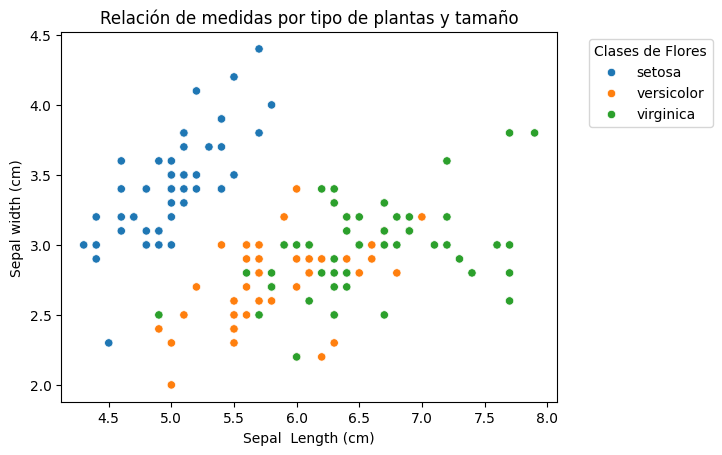

In [16]:
sns.scatterplot(x = df_iris['sepal length (cm)'], y = df_iris['sepal width (cm)'], data = df_iris, hue = 'species')
plt.xlabel('Sepal  Length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title ('Relación de medidas por tipo de plantas y tamaño')
plt.legend(title = 'Clases de Flores', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()



### Conclusiones Ej. 4
Las flores versicolor y virginica tienen un tamaño de hojas parecidos.

## Ejercicio 5 - Visualización de distribuciones con histogramas

En muchos casos, no solo nos interesa el valor de una variable, sino **cómo se distribuyen** esos valores.

Los histogramas son una herramienta visual muy útil para:

- Ver si los datos están **centrados** o dispersos.
- Detectar **asimetrías** (por ejemplo, si hay más valores bajos o altos).
- Identificar posibles **valores atípicos** (*outliers*).
- Observar la **forma general** de la distribución (normal, sesgada, bimodal, etc.).

Vamos a explorar cómo se distribuye el **largo del pétalo** (`petal length (cm)`) en un conjunto de datos de flores.

In [17]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. Crea un **histograma con `Seaborn`** para visualizar la distribución del largo del pétalo (`petal length (cm)`).
2. Ajusta el número de *bins* para tener mayor o menor nivel de detalle. (bins = auto, fd, doane, scott, stone, rice, sturges, sqrt)
3. Agrega título, etiquetas y un estilo visual claro.
4. Escribe tus observaciones, conclusiones o notas en una celda markdown.


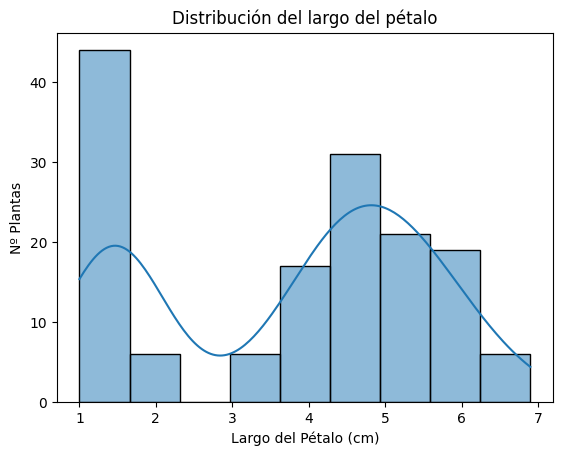

In [18]:
sns.histplot(df_iris['petal length (cm)'], kde = True)
plt.xlabel('Largo del Pétalo (cm)')
plt.ylabel('Nº Plantas')
plt.title("Distribución del largo del pétalo")
plt.show()

### Conclusiones Ej. 5.1
Si hacemos un sns no hace falta usar bins, automaticamente el sns te lo pondrá en el mejor formato posible, de la manera más óptima.

Observamos en el gráfico que más de 40 plantas tiene un tamaño de pétalo de entre 1 y 1,5 cms y más de 30 plantas entre 4,5 y 5 cm de largo de pétalo.

## Comparación por especie (distribuciones múltiples)

Ahora, compara la distribución del largo del pétalo para cada especie de flor usando `Seaborn` y el argumento `hue`.

Esto te permitirá analizar si hay **diferencias significativas** entre los grupos.

- Escribe tus observaciones, conclusiones o notas en una celda markdown.

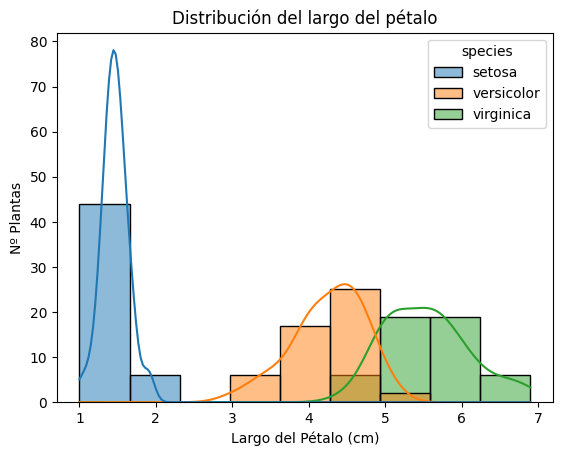

In [19]:
sns.histplot(data = df_iris, x = 'petal length (cm)', hue = 'species', kde=True)
plt.xlabel('Largo del Pétalo (cm)')
plt.ylabel('Nº Plantas')
plt.title("Distribución del largo del pétalo")
plt.show()


### Conclusiones Ej. 5.2
Seguimos apreciando que las especies versicolor y virginica tienen los pétalos de un tamaño parecido.

## Ejercicio 6 - Visualización de relaciones con mapas de calor (heatmap)

En ciencia de datos es importante comprender cómo se relacionan las variables entre sí. Una forma visual de hacerlo es usando mapas de calor, especialmente sobre matrices de correlación.

En este ejercicio vamos a visualizar cómo se relacionan las variables numéricas del conjunto `df_iris`.



1. Crea un mapa de calor que muestre la correlación entre las variables numéricas del DataFrame `df_iris`.Primero necesitas calcular la matriz de correlación usando `.corr()`.
2. Usa la librería **seaborn** para graficar el heatmap.
3. Activa la visualización de los valores dentro del gráfico `(annot=True)`.
4. Escribe tus observaciones, conclusiones o notas en una celda markdown.

In [24]:
# Calcular la matriz de correlación
correlation = df_iris.loc[:,["sepal length (cm)", "sepal width (cm)", 
                             "petal length (cm)", "petal width (cm)"]].corr()

correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


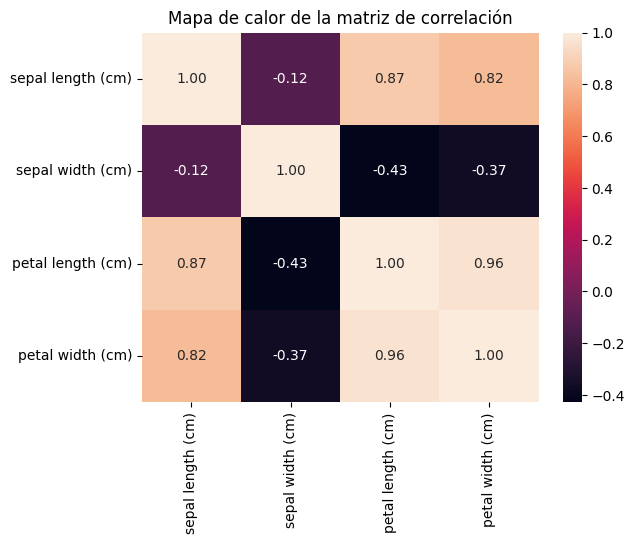

In [25]:
# Crear el heatmap
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

### Conclusiones Ej.6
El sepal width está muy poco correlacionado con petal length, petal width y target.

## Ejercicio 7 - Visualización de la distribución por categorías con boxplot

El boxplot (o diagrama de caja) permite comparar cómo se distribuye una variable numérica según distintas categorías.

Vamos a comparar la distribución del largo del pétalo (petal_length) entre las distintas especies de flores del conjunto `df_iris`. La idea es que grafiques un boxplot que compare el largo del pétalo (`petal length (cm)`) entre las diferentes especies (species).


1. Usa `seaborn.boxplot()` indicando el eje `x` con la especie y `y` con el largo del pétalo.
2. Es recomendable usar `plt.figure()` para ajustar el tamaño del gráfico si es necesario.
3. Escribe tus observaciones, conclusiones o notas en una celda markdown.

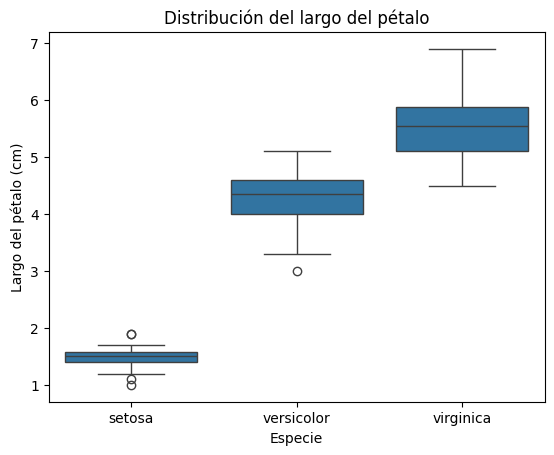

In [26]:
plt.figure()
sns.boxplot(data, x = 'species', y = 'petal length (cm)')
plt.title('Distribución del largo del pétalo')
plt.xlabel('Especie')
plt.ylabel('Largo del pétalo (cm)')
plt.show()

### Conclusiones Ej.7
Observamos que la especie Virginica tiene los petalos más largos que las otras dos especies.